In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
goals = pd.read_csv('/Users/danielle.arneson/Desktop/goals.csv')

/Users/danielle.arneson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991188 entries, 0 to 1991187
Data columns (total 14 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   total_engagement__c              float64
 1   total_received_engagements__c    float64
 2   created_date__c                  object 
 3   external_participant_id__c       object 
 4   x6_week_engagement_modality__c   object 
 5   x6_week_engagement_goal_type__c  object 
 6   program__c                       object 
 7   program_name__c                  object 
 8   limeade_participant_code__c      object 
 9   overall_goal_status__c           object 
 10  discontinued_coaching__c         object 
 11  last_engagement_activity__c      object 
 12  createddate                      object 
 13  goal_completed__c                object 
dtypes: float64(2), object(12)
memory usage: 212.7+ MB


In [4]:
goals.head()

,total_engagement__c,total_received_engagements__c,created_date__c,external_participant_id__c,x6_week_engagement_modality__c,x6_week_engagement_goal_type__c,program__c,program_name__c,limeade_participant_code__c,overall_goal_status__c,discontinued_coaching__c,last_engagement_activity__c,createddate,goal_completed__c
0,6.0,6.0,2019-03-08 00:00:00,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,Group Coaching (Webinar Series),Truth,a0q39000009MY1bAAG,Practice Simple Gratitude,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,Complete,NaN,2019-04-13 00:00:00,2019-03-03 06:23:35,NaN
1,1.0,1.0,2019-03-08 00:00:00,2faff361-5498-47bc-859b-569acf2f34f0,Group Coaching (Webinar Series),Truth,a0q39000009MUVjAAO,Change Your Habits,2faff361-5498-47bc-859b-569acf2f34f0,Dismissed,NaN,2019-03-16 00:00:00,2019-03-03 06:38:54,NaN
2,0.0,0.0,2019-03-08 00:00:00,b615b944-9a60-42db-a3b3-01c1e625ceeb,Group Coaching (Webinar Series),Truth,a0q39000008dC8QAAU,Change Your Habits,b615b944-9a60-42db-a3b3-01c1e625ceeb,No Action,NaN,NaN,2019-03-03 06:50:47,NaN
3,6.0,6.0,2019-03-07 00:00:00,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,Group Coaching (Webinar Series),Stress,a0q39000008dC8QAAU,Live Empowered,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,Complete,NaN,2019-04-11 00:00:00,2019-03-03 08:04:11,NaN
4,0.0,0.0,2019-03-05 00:00:00,9d359efc-f3aa-44a5-a857-26baa2588385,Group Coaching (Webinar Series),Financial,a0q39000008dCNoAAM,Budget Basics,9d359efc-f3aa-44a5-a857-26baa2588385,No Action,NaN,NaN,2019-03-03 12:23:30,NaN


In [5]:
#df clean up
goals['x6_week_engagement_modality__c'] = goals['x6_week_engagement_modality__c'].str.lower()
goals['discontinued_coaching__c'] = goals['discontinued_coaching__c'].str.lower()
goals['program_name__c'] = goals['program_name__c'].str.lower()
goals['x6_week_engagement_goal_type__c'] = goals['x6_week_engagement_goal_type__c'].str.lower()
goals['overall_goal_status__c'] = goals['overall_goal_status__c'].str.lower()
goals['x6_week_engagement_modality__c'] = goals['x6_week_engagement_modality__c'].str.replace("(", "_")
goals['x6_week_engagement_modality__c'] = goals['x6_week_engagement_modality__c'].str.replace("-", "_")
goals['x6_week_engagement_modality__c'] = goals['x6_week_engagement_modality__c'].str.replace(")", "")
goals['x6_week_engagement_modality__c'] = goals['x6_week_engagement_modality__c'].str.replace(" ", "_")
goals['overall_goal_status__c'] = goals['overall_goal_status__c'].str.replace(" ", "_")
goals['program_name__c'] = goals['program_name__c'].str.replace(" ", "_")
goals['discontinued_coaching__c'] = goals['discontinued_coaching__c'].str.replace(" ", "_")
goals.head()

,total_engagement__c,total_received_engagements__c,created_date__c,external_participant_id__c,x6_week_engagement_modality__c,x6_week_engagement_goal_type__c,program__c,program_name__c,limeade_participant_code__c,overall_goal_status__c,discontinued_coaching__c,last_engagement_activity__c,createddate,goal_completed__c
0,6.0,6.0,2019-03-08 00:00:00,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,group_coaching__webinar_series,truth,a0q39000009MY1bAAG,practice_simple_gratitude,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,complete,NaN,2019-04-13 00:00:00,2019-03-03 06:23:35,NaN
1,1.0,1.0,2019-03-08 00:00:00,2faff361-5498-47bc-859b-569acf2f34f0,group_coaching__webinar_series,truth,a0q39000009MUVjAAO,change_your_habits,2faff361-5498-47bc-859b-569acf2f34f0,dismissed,NaN,2019-03-16 00:00:00,2019-03-03 06:38:54,NaN
2,0.0,0.0,2019-03-08 00:00:00,b615b944-9a60-42db-a3b3-01c1e625ceeb,group_coaching__webinar_series,truth,a0q39000008dC8QAAU,change_your_habits,b615b944-9a60-42db-a3b3-01c1e625ceeb,no_action,NaN,NaN,2019-03-03 06:50:47,NaN
3,6.0,6.0,2019-03-07 00:00:00,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,group_coaching__webinar_series,stress,a0q39000008dC8QAAU,live_empowered,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,complete,NaN,2019-04-11 00:00:00,2019-03-03 08:04:11,NaN
4,0.0,0.0,2019-03-05 00:00:00,9d359efc-f3aa-44a5-a857-26baa2588385,group_coaching__webinar_series,financial,a0q39000008dCNoAAM,budget_basics,9d359efc-f3aa-44a5-a857-26baa2588385,no_action,NaN,NaN,2019-03-03 12:23:30,NaN


In [6]:
goals['discontinued_coaching__c'] = goals['discontinued_coaching__c'].fillna(0)

In [7]:
goals['discontinued_coaching__c'].unique()

array([0, 'not_interested', 'coaching_needs_met',
       'general_program_questions', 'prefers_webinars', 'end_of_program',
       'unresponsive', 'not_with_company'], dtype=object)

In [8]:
goals['goal_completed__c'] = goals['goal_completed__c'].fillna(0)

In [9]:
goals['last_engagement_activity__c'] = goals['last_engagement_activity__c'].fillna(0)

In [10]:
goals.head()

,total_engagement__c,total_received_engagements__c,created_date__c,external_participant_id__c,x6_week_engagement_modality__c,x6_week_engagement_goal_type__c,program__c,program_name__c,limeade_participant_code__c,overall_goal_status__c,discontinued_coaching__c,last_engagement_activity__c,createddate,goal_completed__c
0,6.0,6.0,2019-03-08 00:00:00,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,group_coaching__webinar_series,truth,a0q39000009MY1bAAG,practice_simple_gratitude,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,complete,0,2019-04-13 00:00:00,2019-03-03 06:23:35,0
1,1.0,1.0,2019-03-08 00:00:00,2faff361-5498-47bc-859b-569acf2f34f0,group_coaching__webinar_series,truth,a0q39000009MUVjAAO,change_your_habits,2faff361-5498-47bc-859b-569acf2f34f0,dismissed,0,2019-03-16 00:00:00,2019-03-03 06:38:54,0
2,0.0,0.0,2019-03-08 00:00:00,b615b944-9a60-42db-a3b3-01c1e625ceeb,group_coaching__webinar_series,truth,a0q39000008dC8QAAU,change_your_habits,b615b944-9a60-42db-a3b3-01c1e625ceeb,no_action,0,0,2019-03-03 06:50:47,0
3,6.0,6.0,2019-03-07 00:00:00,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,group_coaching__webinar_series,stress,a0q39000008dC8QAAU,live_empowered,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,complete,0,2019-04-11 00:00:00,2019-03-03 08:04:11,0
4,0.0,0.0,2019-03-05 00:00:00,9d359efc-f3aa-44a5-a857-26baa2588385,group_coaching__webinar_series,financial,a0q39000008dCNoAAM,budget_basics,9d359efc-f3aa-44a5-a857-26baa2588385,no_action,0,0,2019-03-03 12:23:30,0


In [ ]:
goals.head()

In [11]:
goals['x6_week_engagement_modality__c'].unique()

array(['group_coaching__webinar_series', 'self_guided',
       'group_coaching__one_time_event', 'digital___amp',
       'one_on_one__onsite', 'one_on_one', 'group_coaching__onsite',
       'one_on_one__1x_event', 'one_on_one__telephonic', 'digital___awp',
       'recorded_session', 'one_on_one__video_coaching', nan,
       'biometric_event_teachable_moment__1x_event', 'ras',
       'group_coaching__onsite_series', 'one_on_one_pgi',
       'digital___ember', 'one_time_company_event'], dtype=object)

In [14]:
goals.columns.tolist()

['total_engagement__c',
 'total_received_engagements__c',
 'created_date__c',
 'external_participant_id__c',
 'x6_week_engagement_modality__c',
 'x6_week_engagement_goal_type__c',
 'program__c',
 'program_name__c',
 'limeade_participant_code__c',
 'overall_goal_status__c',
 'discontinued_coaching__c',
 'last_engagement_activity__c',
 'createddate',
 'goal_completed__c']

In [15]:
goals = goals[goals['x6_week_engagement_modality__c'].notna()]

In [16]:
goals=goals.replace(to_replace =["one_on_one__telephonic"],  
                            value ="one_on_one")

In [17]:
goals=goals.replace(to_replace =['recorded_session'],  
                            value ='group_coaching__webinar_series')

In [18]:
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'one_on_one_pgi'].index)

In [19]:
goals.head()

,total_engagement__c,total_received_engagements__c,created_date__c,external_participant_id__c,x6_week_engagement_modality__c,x6_week_engagement_goal_type__c,program__c,program_name__c,limeade_participant_code__c,overall_goal_status__c,discontinued_coaching__c,last_engagement_activity__c,createddate,goal_completed__c
0,6.0,6.0,2019-03-08 00:00:00,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,group_coaching__webinar_series,truth,a0q39000009MY1bAAG,practice_simple_gratitude,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,complete,0,2019-04-13 00:00:00,2019-03-03 06:23:35,0
1,1.0,1.0,2019-03-08 00:00:00,2faff361-5498-47bc-859b-569acf2f34f0,group_coaching__webinar_series,truth,a0q39000009MUVjAAO,change_your_habits,2faff361-5498-47bc-859b-569acf2f34f0,dismissed,0,2019-03-16 00:00:00,2019-03-03 06:38:54,0
2,0.0,0.0,2019-03-08 00:00:00,b615b944-9a60-42db-a3b3-01c1e625ceeb,group_coaching__webinar_series,truth,a0q39000008dC8QAAU,change_your_habits,b615b944-9a60-42db-a3b3-01c1e625ceeb,no_action,0,0,2019-03-03 06:50:47,0
3,6.0,6.0,2019-03-07 00:00:00,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,group_coaching__webinar_series,stress,a0q39000008dC8QAAU,live_empowered,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,complete,0,2019-04-11 00:00:00,2019-03-03 08:04:11,0
4,0.0,0.0,2019-03-05 00:00:00,9d359efc-f3aa-44a5-a857-26baa2588385,group_coaching__webinar_series,financial,a0q39000008dCNoAAM,budget_basics,9d359efc-f3aa-44a5-a857-26baa2588385,no_action,0,0,2019-03-03 12:23:30,0


In [20]:
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'group_coaching__one_time_event'].index) 

In [21]:
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'one_on_one__video_coaching'].index) 
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'one_on_one__1x_event'].index) 
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'biometric_event_teachable_moment__1x_event'].index) 
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'one_time_company_event'].index) 

In [22]:
goals['x6_week_engagement_modality__c'].unique()

array(['group_coaching__webinar_series', 'self_guided', 'digital___amp',
       'one_on_one__onsite', 'one_on_one', 'group_coaching__onsite',
       'digital___awp', 'ras', 'group_coaching__onsite_series',
       'digital___ember'], dtype=object)

In [23]:
goals = goals.drop(goals[goals.x6_week_engagement_modality__c == 'group_coaching__onsite_series'].index)

In [24]:
goals = goals[goals['createddate'] > '2017-01-01 12:00:00']

In [25]:
goals.head(50)

,total_engagement__c,total_received_engagements__c,created_date__c,external_participant_id__c,x6_week_engagement_modality__c,x6_week_engagement_goal_type__c,program__c,program_name__c,limeade_participant_code__c,overall_goal_status__c,discontinued_coaching__c,last_engagement_activity__c,createddate,goal_completed__c
0,6.0,6.0,2019-03-08 00:00:00,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,group_coaching__webinar_series,truth,a0q39000009MY1bAAG,practice_simple_gratitude,93aabbbc-85e8-4a5e-aa62-cb0e7e8ec4dc,complete,0,2019-04-13 00:00:00,2019-03-03 06:23:35,0
1,1.0,1.0,2019-03-08 00:00:00,2faff361-5498-47bc-859b-569acf2f34f0,group_coaching__webinar_series,truth,a0q39000009MUVjAAO,change_your_habits,2faff361-5498-47bc-859b-569acf2f34f0,dismissed,0,2019-03-16 00:00:00,2019-03-03 06:38:54,0
2,0.0,0.0,2019-03-08 00:00:00,b615b944-9a60-42db-a3b3-01c1e625ceeb,group_coaching__webinar_series,truth,a0q39000008dC8QAAU,change_your_habits,b615b944-9a60-42db-a3b3-01c1e625ceeb,no_action,0,0,2019-03-03 06:50:47,0
3,6.0,6.0,2019-03-07 00:00:00,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,group_coaching__webinar_series,stress,a0q39000008dC8QAAU,live_empowered,c81b8296-ab0b-4c90-8b3c-c1c32c3a6a6d,complete,0,2019-04-11 00:00:00,2019-03-03 08:04:11,0
4,0.0,0.0,2019-03-05 00:00:00,9d359efc-f3aa-44a5-a857-26baa2588385,group_coaching__webinar_series,financial,a0q39000008dCNoAAM,budget_basics,9d359efc-f3aa-44a5-a857-26baa2588385,no_action,0,0,2019-03-03 12:23:30,0
5,6.0,6.0,2019-03-08 00:00:00,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,group_coaching__webinar_series,financial,a0q39000009MVgYAAW,dream_big,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,complete,0,2019-04-16 00:00:00,2019-03-03 13:30:41,0
6,6.0,6.0,2019-03-08 00:00:00,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,group_coaching__webinar_series,truth,a0q39000009MVgYAAW,change_your_habits,1abd0eb4-6eb1-4d67-aded-7625a734c4eb,complete,0,2019-04-16 00:00:00,2019-03-03 13:35:02,0
7,1.0,1.0,2019-03-03 00:00:00,fc5b4405-baca-47aa-bc12-bf37de8ba412,self_guided,roadmap to success,a0q39000008dC3wAAE,roadmap_to_success,fc5b4405-baca-47aa-bc12-bf37de8ba412,complete,0,0,2019-03-03 13:38:06,0
8,2.0,2.0,2019-03-04 00:00:00,980a9f9b-2e8f-4224-bd42-5bd28e80c2e0,group_coaching__webinar_series,truth,a0q39000008dCtfAAE,be_a_change_maker,980a9f9b-2e8f-4224-bd42-5bd28e80c2e0,dismissed,0,2019-03-11 00:00:00,2019-03-03 14:01:52,0
9,2.0,2.0,2019-03-07 00:00:00,980a9f9b-2e8f-4224-bd42-5bd28e80c2e0,group_coaching__webinar_series,truth,a0q39000008dCtfAAE,making_a_difference,980a9f9b-2e8f-4224-bd42-5bd28e80c2e0,dismissed,0,2019-03-14 00:00:00,2019-03-03 14:02:47,0


In [26]:
goals['x6_week_engagement_modality__c'].value_counts()

group_coaching__webinar_series    1533201
self_guided                        172298
digital___amp                       38991
one_on_one                          30023
group_coaching__onsite               3817
one_on_one__onsite                   2844
digital___awp                        1365
digital___ember                       936
Name: x6_week_engagement_modality__c, dtype: int64

In [27]:
goals['status'].value_counts()

KeyError: 'status'

Text(0.5, 0, 'Count')

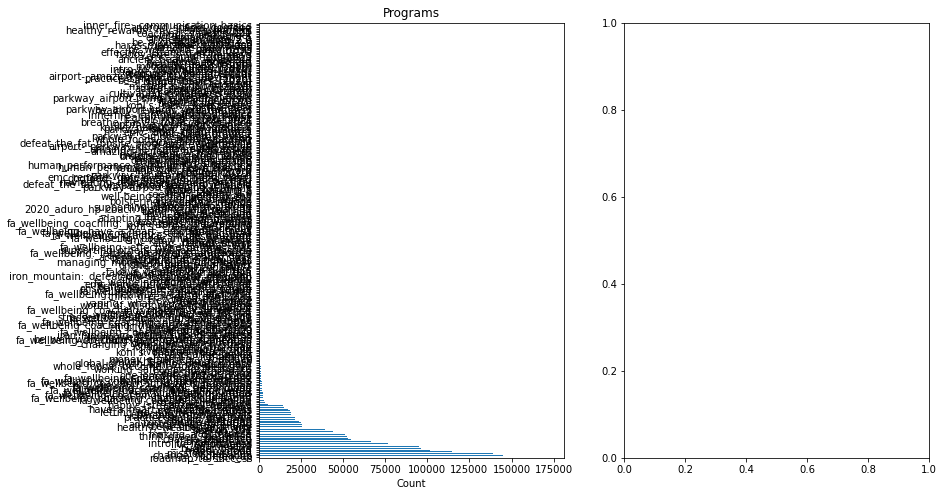

In [28]:
#bar graph of programs
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
goals.program_name__c.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Programs')
ax[0].set_xlabel('Count')
